In [1]:
import pandas as pd
import numpy as np

big_df = pd.DataFrame()

for i in range(0, 3300, 100):
    start = i
    end = i + 100
    file_name = "./02_df_reviews_{}_{}_replaced_sentiment.csv".format(start, end)
    try:
        df = pd.read_csv(file_name)
    except:
        continue
    big_df = pd.concat([big_df, df], axis=0)


    

In [2]:
big_df.head()

,page,group,subgroup,nreview,user,role,postcount,datecreated,hourcreated,message,reply,replaced_message,sentiment,sentiment_label,sentiment_score
0,1.0,Honda,Honda Accord,1.0,chait6756,Member,3.0,2019-11-02,07:16:09,"Hello,Can I request for the numbers like resid...",No,"Hello,Can I request for the numbers like resid...",['NEGATIVE' 0.9943301677703857],NaN,NaN
1,1.0,Honda,Honda Accord,2.0,Jwalker714,Member,4.0,2019-11-02,15:09:05,"Hi there! May I please get the MF, residual an...",No,"Hi there! May I please get the MF, residual an...",['NEGATIVE' 0.9827836751937866],NaN,NaN
2,1.0,Honda,Honda Accord,3.0,kyfdx,Moderator,217095.0,2019-11-02,15:28:12,"chait6756 said:Hello,Can I request for the num...",Yes,"chait6756 said:Hello,Can I request for the num...",['NEGATIVE' 0.9960482716560364],NaN,NaN
3,1.0,Honda,Honda Accord,4.0,Crownedjules,Member,34.0,2019-11-06,01:21:10,"Looking for RV, MF and incentives on 2020 Acco...",No,"Looking for RV, MF and incentives on 2020 Acco...",['NEGATIVE' 0.9840077757835388],NaN,NaN
4,1.0,Honda,Honda Accord,5.0,Michaell,Moderator,219540.0,2019-11-06,07:33:53,"Crownedjules said:Looking for RV, MF and incen...",Yes,.00150 and 57%$500 dealer incentive,['NEGATIVE' 0.9592607021331787],NaN,NaN


In [2]:
import re

def get_first(x):
    # match anything between single quotes
    try:
        return re.findall(r"'(.*?)'", x)[0]
    except:
        return 'Nuetral'
    
def get_second(x):
    # match numbers including floats
    try:
        return re.findall(r"[-+]?\d*\.\d+|\d+", x)[0]
    except:
        return 0

big_df['sentiment_label'] = big_df['sentiment'].apply(lambda x: get_first(x))
big_df['sentiment_score'] = big_df['sentiment'].apply(lambda x: get_second(x))

In [3]:
big_df

,page,group,subgroup,nreview,user,role,postcount,datecreated,hourcreated,message,reply,replaced_message,sentiment,sentiment_label,sentiment_score
0,1.0,Honda,Honda Accord,1.0,chait6756,Member,3.0,2019-11-02,07:16:09,"Hello,Can I request for the numbers like resid...",No,"Hello,Can I request for the numbers like resid...",['NEGATIVE' 0.9943301677703857],NEGATIVE,0.9943301677703857
1,1.0,Honda,Honda Accord,2.0,Jwalker714,Member,4.0,2019-11-02,15:09:05,"Hi there! May I please get the MF, residual an...",No,"Hi there! May I please get the MF, residual an...",['NEGATIVE' 0.9827836751937866],NEGATIVE,0.9827836751937866
2,1.0,Honda,Honda Accord,3.0,kyfdx,Moderator,217095.0,2019-11-02,15:28:12,"chait6756 said:Hello,Can I request for the num...",Yes,"chait6756 said:Hello,Can I request for the num...",['NEGATIVE' 0.9960482716560364],NEGATIVE,0.9960482716560364
3,1.0,Honda,Honda Accord,4.0,Crownedjules,Member,34.0,2019-11-06,01:21:10,"Looking for RV, MF and incentives on 2020 Acco...",No,"Looking for RV, MF and incentives on 2020 Acco...",['NEGATIVE' 0.9840077757835388],NEGATIVE,0.9840077757835388
4,1.0,Honda,Honda Accord,5.0,Michaell,Moderator,219540.0,2019-11-06,07:33:53,"Crownedjules said:Looking for RV, MF and incen...",Yes,.00150 and 57%$500 dealer incentive,['NEGATIVE' 0.9592607021331787],NEGATIVE,0.9592607021331787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,3300.0,Mazda,Mazda CX-7,1.0,fonefixer,Member,247.0,2007-02-08,15:53:00,Purchased the Mazda factory extended warranty ...,No,Purchased the Mazda factory extended warranty ...,NaN,Nuetral,0
5104,3300.0,Mazda,Mazda CX-7,2.0,phillygwm,Member,3.0,2007-04-06,23:49:48,I bought mine at the time I purchased my CX-7....,No,I bought mine at the time I purchased my CX-7....,NaN,Nuetral,0
5105,3300.0,Mazda,Mazda CX-7,3.0,jg6,Member,70.0,2007-04-10,04:40:36,"72/100,000/$100 MEPP ""Total Care"" for CX-7$1,2...",No,"72/100,000/$100 MEPP ""Total Care"" for CX-7$1,2...",NaN,Nuetral,0
5106,3300.0,Mazda,Mazda CX-7,4.0,fonefixer,Member,247.0,2007-04-10,23:18:44,The Mazda dealer claimed they were giving me t...,No,The Mazda dealer claimed they were giving me t...,NaN,Nuetral,0


In [4]:
# Get value counts of brands (column name: group)
big_df['group'].value_counts()

General          61637
Honda            28359
Toyota           18443
BMW              15085
Acura            14771
Lexus            13634
Audi             11053
Subaru           10750
Hyundai           9445
Chevrolet         9385
Chrysler          9344
Mazda             9240
Mercedes-Benz     8572
Jeep              8557
Ford              8520
Volkswagen        6899
Nissan            6563
Dodge             6511
Kia               5320
Buick             5088
Infiniti          5068
GMC               3620
Land Rover        3179
Volvo             3114
Pontiac           2214
Jaguar            2093
Mitsubishi        2085
Ram               1718
Porsche           1569
Cadillac          1536
Lincoln           1137
Alfa Romeo         876
Genesis            692
MINI               509
Maserati           320
Suzuki             302
Editorial          260
Saturn             249
Polestar           201
HUMMER             170
No                 154
Scion              114
FIAT                86
Saab       

In [5]:
honda_comments = big_df[big_df['group'] == 'Honda'].copy()

honda_comments['datecreated'] = pd.to_datetime(honda_comments['datecreated'])

honda_comments['month_and_year'] = honda_comments['datecreated'].dt.to_period('M')

honda_comments

,page,group,subgroup,nreview,user,role,postcount,datecreated,hourcreated,message,reply,replaced_message,sentiment,sentiment_label,sentiment_score,month_and_year
0,1.0,Honda,Honda Accord,1.0,chait6756,Member,3.0,2019-11-02,07:16:09,"Hello,Can I request for the numbers like resid...",No,"Hello,Can I request for the numbers like resid...",['NEGATIVE' 0.9943301677703857],NEGATIVE,0.9943301677703857,2019-11
1,1.0,Honda,Honda Accord,2.0,Jwalker714,Member,4.0,2019-11-02,15:09:05,"Hi there! May I please get the MF, residual an...",No,"Hi there! May I please get the MF, residual an...",['NEGATIVE' 0.9827836751937866],NEGATIVE,0.9827836751937866,2019-11
2,1.0,Honda,Honda Accord,3.0,kyfdx,Moderator,217095.0,2019-11-02,15:28:12,"chait6756 said:Hello,Can I request for the num...",Yes,"chait6756 said:Hello,Can I request for the num...",['NEGATIVE' 0.9960482716560364],NEGATIVE,0.9960482716560364,2019-11
3,1.0,Honda,Honda Accord,4.0,Crownedjules,Member,34.0,2019-11-06,01:21:10,"Looking for RV, MF and incentives on 2020 Acco...",No,"Looking for RV, MF and incentives on 2020 Acco...",['NEGATIVE' 0.9840077757835388],NEGATIVE,0.9840077757835388,2019-11
4,1.0,Honda,Honda Accord,5.0,Michaell,Moderator,219540.0,2019-11-06,07:33:53,"Crownedjules said:Looking for RV, MF and incen...",Yes,.00150 and 57%$500 dealer incentive,['NEGATIVE' 0.9592607021331787],NEGATIVE,0.9592607021331787,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,3289.0,Honda,Honda Accord,6.0,tallman1,Member,1874.0,2006-08-22,03:51:58,Oh good... your post said that you had the dea...,No,Oh good... your post said that you had the dea...,NaN,Nuetral,0,2006-08
4774,3289.0,Honda,Honda Accord,7.0,rubble,Member,12.0,2007-03-26,18:08:11,...Going to purchase this weekend (end of the ...,No,...Going to purchase this weekend (end of the ...,NaN,Nuetral,0,2007-03
4775,3289.0,Honda,Honda Accord,8.0,pat,Member,10421.0,2007-03-26,18:21:27,Try checking in this discussion: Accord Prices...,No,Try checking in this discussion: Accord Prices...,NaN,Nuetral,0,2007-03
4776,3289.0,Honda,Honda Accord,9.0,bamaflum,Member,39.0,2007-03-26,18:24:45,"Invoice is 24,820. Dealers are getting $750 in...",No,"Invoice is 24,820. Dealers are getting $750 in...",NaN,Nuetral,0,2007-03


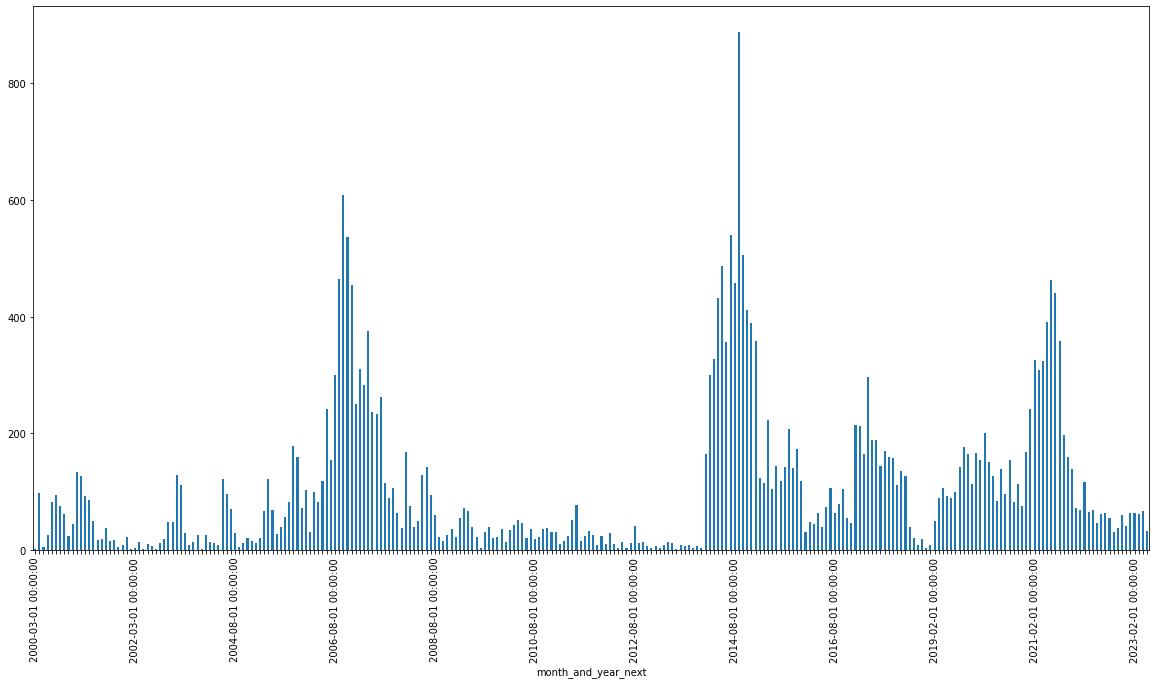

In [13]:
# Aggregate by month and year plot number of obs and bar plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

# Sort honda_comments by month and year
honda_comments = honda_comments.sort_values(by='month_and_year')

# Move month_and_year to the first of the next month

honda_comments['month_and_year_next'] = honda_comments['month_and_year'].dt.to_timestamp() + pd.offsets.MonthBegin(1)


honda_comments.groupby('month_and_year_next').count()['reply'].plot(kind='bar', figsize=(20, 10), ax=ax)

# x axis labels only show every 5th label
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 24 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()



In [14]:
# value counts of sentiment_label
honda_comments['sentiment_label'].value_counts()

Nuetral     24238
NEGATIVE     3081
POSITIVE     1036
missing         4
Name: sentiment_label, dtype: int64